In [222]:
import numpy as np
import matplotlib.pyplot as plt

# Método de bisección

Este método de busqueda por bisección es utilizado para encontrar raíces de una
función continua de variable real. La única condición es que la función cambie de
signo en el intervalo en que buscamos. La existencia de la raíz de la función está
garantizada de acuerdo al teorema de Bolzano:

> <b>Teorema de Bolzano </b>: 
Si $f : [a, b] \to \mathbb{R}$, es una función continua en $[a, b]$ y $f(a)f(b) < 0$, entonces
existe $x_0 \in  [a, b]$ tal que $f(x_0) = 0$.

El método consiste en bisecar el intervalo $[a, b]$, estudiar los signos de $f$ en los
extremos de los nuevos intervalos de manera que podamos afirmar la existencia de
una raíz en un intervalo más pequeño como consecuencia del teorema de Bolzano.

## Algoritmo

Datos de entrada: $a, b,$ función, tolerancia.

calcular $x_0 =\dfrac{a+b}{2}$

Para $i = 0,1,2, ...$ 

* Si $f(a)f(x_i) < 0$, entonces $b = x_i$
* Si $f(a)f(x_i) > 0$, entonces $a = x_i$
* Si $f(a)f(x_i) = 0$, entonces $x_{i+1} = x_{i}$

Hasta que $|x_{i+1}-x_{i}|< tolerancia$. Así entonces si elaboramos una función en `Python` que permita encontrar una aproximación de una raíz de una función $f:[a,b] \to \mathbb{R}$ usando el método de bisección, considerando como datos de entrada una función, $a,b$ y la tolerancia, tendremos:

Se llama biseccion porque propone bisecar una funcion, corta un intervalo donde esta una raiz

In [223]:
def metodo_biseccion(a,b,f,t): #definimos la función
    if f(a)*f(b)>= 0:
        print("El método de bisección no puede aplicarse si no hay cambio de signo.")
        return None
    x0=(a+b)/2
    while abs(b-a)>t:
        if f(a)*f(x0)<0:
            b=x0
        else:
            a=x0
        x0=(a+b)/2
    return x0

### Ejemplo 01:
Utilice la función anterior y el teorema de Bolzano para encontrar las cuatro raíces de $f(x)=10x^3-2x^2+1-e^{2x}$. Hint: las raíces se encuentran en el intervalo $[-1,3]$.

#### Solución:

Antes de empezar, de acuerdo con el teorema de Bolsano, debemos establecer los intervalos para encontrar las raíces, para ello graficamos en el intervalo que nos señalan en el enunciado:

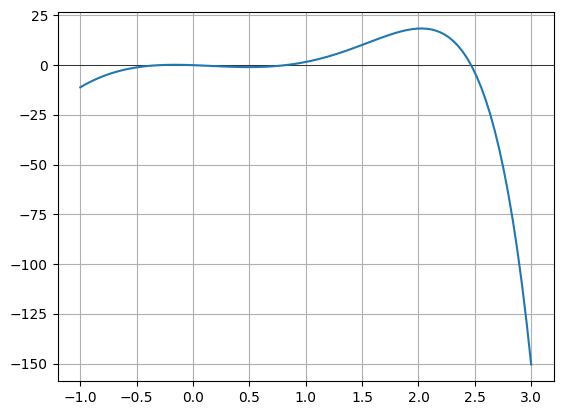

In [224]:
#primero definimos la función
def f(x): return 10*x**3-2*x**2+1-np.exp(2*x)

#ahora hacemos el gráfico:
x=np.linspace(-1,3,100)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

El gráfico no nos entrega mucha información, por tanto debemos acotar los intervalos de nuestros gráficos para avanzar en el estudio de las raíces de esta función:

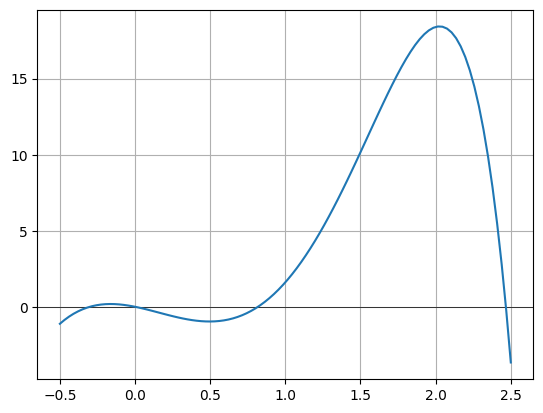

In [225]:
x=np.linspace(-0.5,2.5,100)
plt.axhline(0, color='black', linewidth=0.5)
y=f(x)
plt.plot(x,y)
plt.grid()

In [226]:
#primera raíz:
metodo_biseccion(-0.4,-0.2,f,0.00001)

-0.30042419433593753

In [227]:
#segunda raíz:
metodo_biseccion(-0.1,0.2,f,0.00001)

-1.52587890625e-06

In [228]:
#tercera raíz:
metodo_biseccion(0.6,1,f,0.00001)

0.8179107666015626

In [229]:
#cuarta raíz:
metodo_biseccion(2,3,f,0.00001)

2.467357635498047

# Método de Newtwon Raphson

Este método es uno de los más populares para encontrar los ceros de una función, pero
requiere del conocimiento de su derivada. La regla principal del algoritmo consiste
en que, dado un punto $x_k$ cercano a la raíz de $f$, se determina la recta tangente a $f$
en $(x_k, f(x_k))$: <br>

$$y = f(x_k) + f'(x_k)(x - x_k)$$

Luego, se define la iteración siguiente $x_{k+1}$ como el punto de intersección entre esa
recta y el eje $x$, es decir, $x_{k+1}$ se obtiene al despejar

$$0 = f(x_k) + f(x_k)(x_{k+1} - x_k)$$

esto es
$$ x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}  $$ 

<table><tr>
<td> <img src="NewtonIteration_Ani.gif" alt="Drawing" style="width: 512px;"/> </td>
</tr></table>

## Algoritmo

Datos de entrada: $x_0, f , tolerancia$

Para $k = 0, 1, 2, ...$

* calcular $x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}$

Hasta que $| x_{k+1} - x_k | < tolerancia$

### Ejemplo 01

Elabore una función en Python que permita encontrar una aproximación de una raíz de una función $f:[a,b] \to \mathbb{R}$ usando el método de Newton-Raphson, considerando como datos de entrada un valor cercano a la raíz $x_0$, la función en cuestión $f$, su derivada $df$ y la tolerancia $t$.


In [230]:
import numpy as np
def newton_raphson(x0,f,df,t):
    X=[x0]
    while True:
        xn=X[-1]-(f(X[-1])/df(X[-1]))
        X.append(xn)
        if np.abs(X[-1]-X[-2])<t:
            break
    return X[-1]

### Ejemplo 02

Encontrar una aproximación de las raíces de la función $f(x) = x^4-2$ cercana a $x_0=4$ con una tolerancia de $0,000001$.

In [231]:
def f(x): return x**4-2
def df(x): return 4*x**3
newton_raphson(4,f,df,0.000001)
#desafío, comprobar

1.189207115002721

In [232]:
def f(x): return x**4-2
def df(x): return 4*x**3
newton_raphson(-2,f,df,0.000001)
#desafío, comprobar

-1.1892071150027281

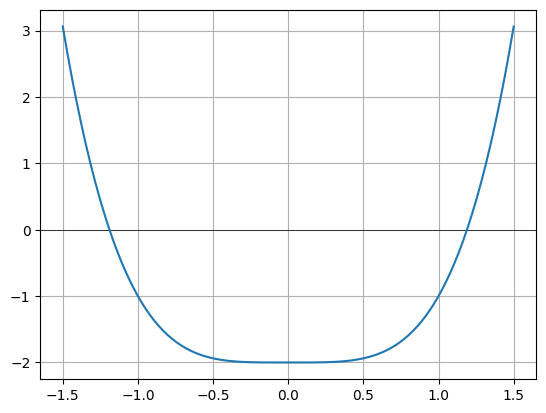

In [233]:
x=np.linspace(-1.5,1.5,100)
plt.axhline(0, color='black', linewidth=0.5)
y=f(x)
plt.plot(x,y)
plt.grid()

## Ejercicios:
### Ejercicio 01

La ecuación $\ln(2x) = \dfrac{x}{2}$ tiene dos soluciones. Utilice el método de la bisección con un error máximo de $10^{-8}$ para estimar las soluciones de la ecuación. Justifique su razonamiento para aplicar el método:

   * Formulación de la función a utilizar.
   * Elección de intervalo.
   * Elección de la tolerancia.

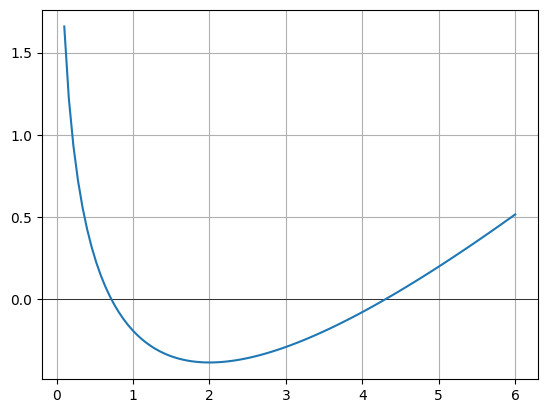

In [234]:
#primero definimos la función
def f(x): return (x/2) - np.log(2*x)

#ahora hacemos el gráfico:
x=np.linspace(0.1,6,100)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

In [235]:
#primera raíz:
metodo_biseccion(0.5,1,f,0.000000001)

0.7148059126920998

In [236]:
#segunda raíz:
metodo_biseccion(4,4.5,f,0.000000001)

4.306584728416055

### Ejercicio 02:

Encontrar utilizando el método de bisección una aproximación de $\sqrt[3]{5}$.

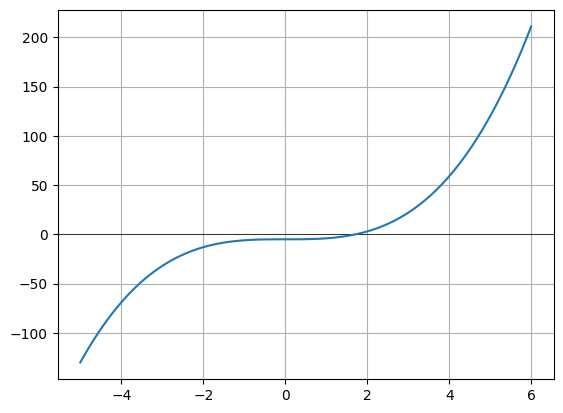

In [237]:
#primero definimos la función
def f(x): return (x**3)-5

#ahora hacemos el gráfico:
x=np.linspace(-5,6,100)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

In [238]:
#raíz:
metodo_biseccion(0,2,f,0.000000001)

1.7099759462289512

### Ejercicio 03                                     

Utilice e método de Newton-Raphson para encontrar las cuatro raíces de $f(x)=10x^3-2x^2+1-e^{2x}$. Ayuda: las raíces se encuentran en el intervalo $[-1,3]$.

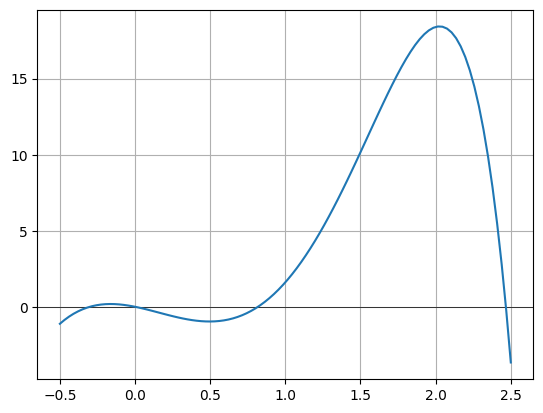

In [239]:
def f(x): return 10*x**3-2*x**2+1-np.exp(2*x)
def df(x): return (30*x**2)-(4*x)-2*np.exp(2*x)

x=np.linspace(-0.5,2.5,100)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()


In [240]:
newton_raphson(-1,f,df,0.000001)
#desafío, comprobar

np.float64(-0.3004232820278312)

In [241]:
newton_raphson(0.5,f,df,0.000001)
#desafío, comprobar

np.float64(2.4673563603513613)

In [242]:
newton_raphson(1,f,df,0.000001)
#desafío, comprobar

np.float64(0.817908702943693)

In [243]:
newton_raphson(2.5,f,df,0.000001)
#desafío, comprobar

np.float64(2.4673563603513617)

### Ejercicio 04

La ecuación $\ln(2x) = \dfrac{x}{2}$ tiene dos soluciones. Utilice el método de Newton-Raphson con un error máximo de $10^{-8}$ para estimar las soluciones de la ecuación. Justifique su razonamiento para aplicar el método:

   * Formulación de la función a utilizar.
   * Elección de intervalo.
   * Elección de la tolerancia.

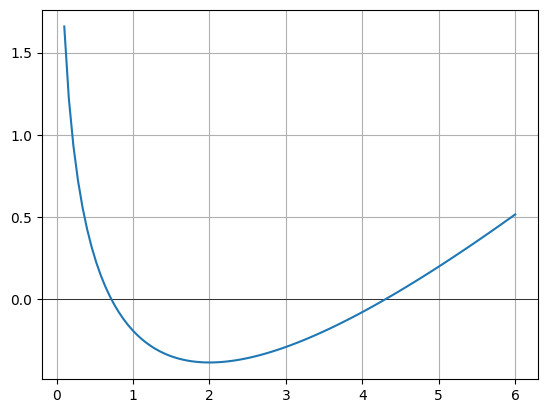

In [244]:
#primero definimos la función
def f(x): return (x/2) - np.log(2*x)
def df(x): return 0.5 - (1/(2*x))

#ahora hacemos el gráfico:
x=np.linspace(0.1,6,100)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()



In [245]:
newton_raphson(5,f,df,0.000001)

np.float64(4.3065851074567805)

In [246]:
#newton_raphson(0.7,f,df,0.000001)

### Ejercicio 05*:

Encuentre la solución(es) a la ecuación:
$$\dfrac{1}{1-x}=e^x$$
en el intervalo $[-0.5,\, 1]$ mediante el método de Newton-Raphson, si es posible. En caso contrario, justifique.


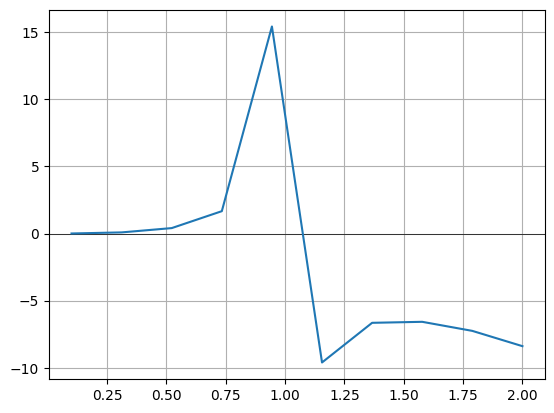

In [247]:
#primero definimos la función
def f(x): return (1/(1-x)) - np.exp(x)
def df(x): return (1/(1-x)**2) - np.exp(x)

#ahora hacemos el gráfico:
x=np.linspace(0.1,2,10)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()


In [248]:
#newton_raphson(1,f,df,0.000001)

### Ejercicio 06

Encontrar utilizando el método de Newton-Raphson una aproximación de $\sqrt[3]{7}$.

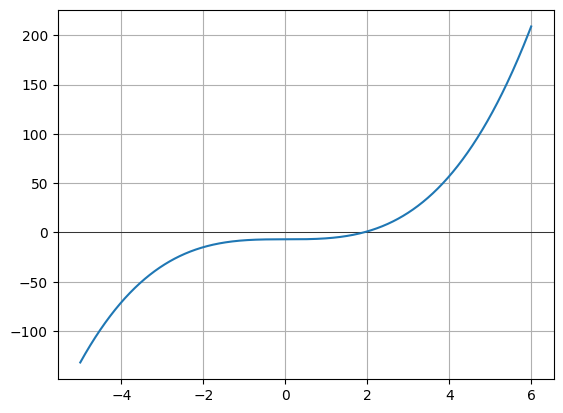

In [249]:
def f(x): return (x**3)-7
def df(x): return 3*x**2

#ahora hacemos el gráfico:
x=np.linspace(-5,6,1000)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

In [251]:
newton_raphson(2,f,df,0.000001)

1.9129311827723892

### Ejercicio 07

Una canaleta  de largo $L$ tiene por sección tranversal forma de semicircunferencia de radio $r$ (ambos medidos en cm), como muestra la figura a contianuación:

<table><tr>
<td> <img src="C1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="C2.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Cuando se llena de agua hasta una distancia $h$ de su parte superior, el volumen $V$ de agua es

$$V=L\left[ \frac{1}{2}\pi r^2 - r^2\arcsin\left(\frac{h}{r} \right) - h\sqrt{r^2-h^2} \right]$$

Suponga que el $L=300 [m]$, $r=30 [cm]$ y el volumen de agua es $V=216 [cm^3]$. Encuentre una aproximación de la altura del agua desde la base de la canaleta.


In [ ]:
L = 300
r = 30 
V = 216 

def f(x): return (x**3)-7
#ahora hacemos el gráfico:
x=np.linspace(-5,6,1000)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

### Ejercicio 08

Encontrar una aproximación de el (los) punto(s) de intersección de las curvas $y=e^x$ e $y=x^2$, utilizando el método de Newton-Raphson.

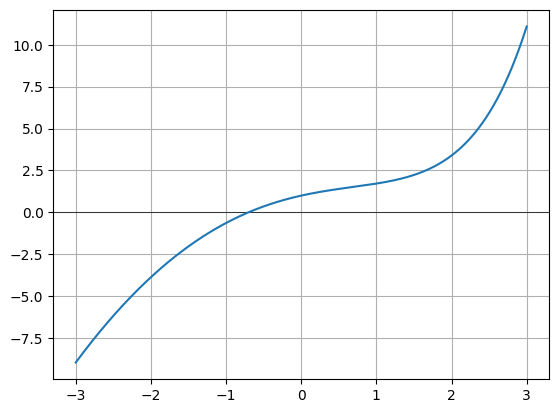

In [273]:
def f(x): return np.exp(x) - x**2  # En la intersección: e^x - x^2 = 0
def df(x): return np.exp(x) - 2*x  # Derivada: e^x - 2x

x=np.linspace(-3,3,1000)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

In [270]:
metodo_biseccion(-1,0,f,0.000000001)

-0.7034674226306379

In [271]:
newton_raphson(-1,f,df,0.000001)

np.float64(-0.7034674224983924)

### Ejercicio 09

Encontrar una aproximación de la raíz de la función $h(x) = e^x + 2$ cercana a $x_0 = 2$ con una tolerancia de $0,01.$ Use ambos métodos.

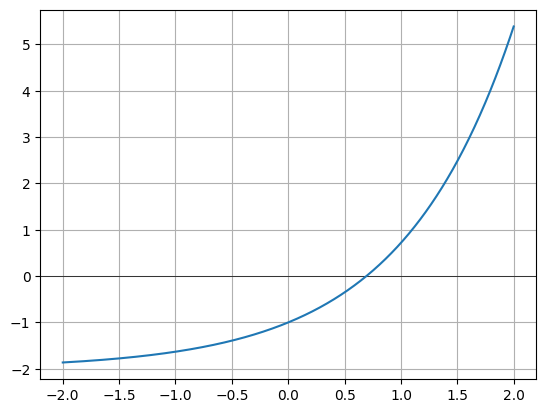

In [ ]:
def f(x): return np.exp(x) - 2
def df(x): return np.exp(x)
#ahora hacemos el gráfico:
x=np.linspace(-2,2,1000)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

In [258]:
metodo_biseccion(0,1,f,0.000000001)

0.6931471801362932

In [259]:
newton_raphson(0.5,f,df,0.000001)

np.float64(0.6931470345412999)

### Ejercicio 10

Encontrar una aproximación de $\sqrt{3}$. Use ambos métodos.

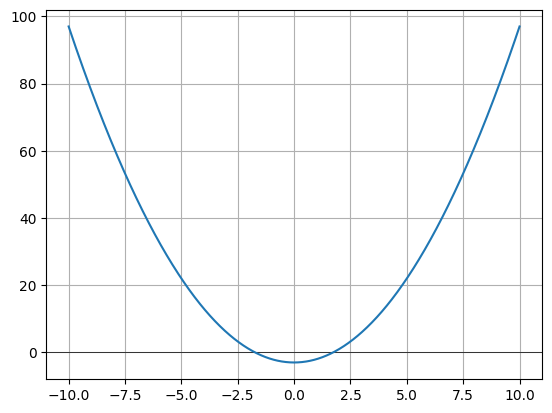

In [265]:
def f(x): return (x**2)-3
def df(x): return 2*x
#ahora hacemos el gráfico:
x=np.linspace(-10,10,1000)
y=f(x)
plt.axhline(0, color='black', linewidth=0.5)
plt.plot(x,y)
plt.grid()

In [261]:
metodo_biseccion(-4,0,f,0.000000001)

-1.7320508076809347

In [262]:
metodo_biseccion(0,2,f,0.000000001)

1.7320508076809347

In [263]:
newton_raphson(-2,f,df,0.000001)

-1.7320508075688772

In [264]:
newton_raphson(2,f,df,0.000001)

1.7320508075688772